# 2024 OIBC Challenge
## (Deep Learning version skeleton 03)

In [106]:
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
import os
from datetime import datetime, timedelta
from tqdm import tqdm

### 데이터 전처리

In [107]:
print(os.getcwd())  # 현재 작업 경로 출력

f:\For me\Project\24-OIBC-WolgoksTears\personal_files\hoon


actual_weather_1

In [108]:
# 데이터 불러오기
actual_weather_1 = pd.read_csv("../../data_files/actual_weather_1.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
actual_weather_1['datetime'] = pd.to_datetime(actual_weather_1['ts'], unit='s')
actual_weather_1['datetime'] = actual_weather_1['datetime'].dt.round('h') + timedelta(hours=9)

# 원래 'ts' 열과 'location' 제거
actual_weather_1.drop(columns=['ts'], inplace=True)
actual_weather_1.drop(columns=['location'], inplace=True)

# 1시간 단위로 그룹화하여 평균을 계산 (location을 제외한 모든 열)
actual_weather_1 = actual_weather_1.groupby(['datetime'], as_index=False).mean()


# weather_forecast에 없는 columns 제거
actual_weather_1.drop(columns=['real_feel_temp_shade'], inplace=True)
actual_weather_1.drop(columns=['pressure'], inplace=True)
actual_weather_1.drop(columns=['appr_temp'], inplace=True)
actual_weather_1.drop(columns=['wind_chill_temp'], inplace=True)
 
# 결과 확인
actual_weather_1.head()

,datetime,temp,real_feel_temp,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,wet_bulb_temp,precip_1h
0,2024-03-01 00:00:00,8.500000,8.000000,81.000000,5.500000,270.000000,6.100000,17.600000,0.0,20.900000,91.000000,579.000000,7.100000,0.100000
1,2024-03-01 01:00:00,7.158333,3.041667,72.666667,2.508333,234.666667,20.483333,26.366667,0.0,20.783333,97.750000,693.416667,5.091667,0.008333
2,2024-03-01 02:00:00,6.477778,2.111111,75.666667,2.433333,262.888889,21.944444,27.433333,0.0,20.033333,86.333333,616.222222,4.733333,0.011111
3,2024-03-01 03:00:00,6.045455,0.900000,74.545455,1.663636,213.000000,22.490909,27.645455,0.0,19.900000,62.818182,8692.363636,4.209091,0.136364
4,2024-03-01 04:00:00,5.430000,-0.090000,68.100000,-0.030000,256.800000,26.140000,42.440000,0.0,23.800000,38.100000,10911.800000,3.180000,0.410000


weather_forecast

In [109]:
# 데이터 불러오기
weather_forecast_1 = pd.read_csv("../../data_files/weather_forecast_1.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
weather_forecast_1['datetime'] = pd.to_datetime(weather_forecast_1['ts'], unit='s')
weather_forecast_1['datetime'] = weather_forecast_1['datetime'].dt.round('h') + timedelta(hours=9)

# 원래 'ts' 열 제거, 'base_ts' 열 제거, 'location' 제거
weather_forecast_1.drop(columns=['ts'], inplace=True)
weather_forecast_1.drop(columns=['base_ts'], inplace=True)
weather_forecast_1.drop(columns=['location'], inplace=True)

# 1시간 단위로 그룹화하여 평균을 계산 (location을 제외한 모든 열)
weather_forecast_1 = weather_forecast_1.groupby(['datetime'], as_index=False).mean()


# 예보 데이터의 columns 순서를 actual_weather columns 순서와 맞추기
weather_forecast_1 = weather_forecast_1[['datetime', 'temp', 'real_feel_temp', 'rel_hum',
       'dew_point', 'wind_dir', 'wind_spd', 'wind_gust_spd', 'uv_idx', 'vis',
       'cld_cvr', 'ceiling', 'wet_bulb_temp', 'total_liq']]
weather_forecast_1['precip_1h'] = weather_forecast_1['total_liq']
weather_forecast_1.drop(columns=['total_liq'], inplace=True)  

# 결과 확인
weather_forecast_1.head()

,datetime,temp,real_feel_temp,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,wet_bulb_temp,precip_1h
0,2024-03-02 00:00:00,1.728394,-4.320987,64.333333,-4.320987,335.555556,22.048022,50.604944,0.0,16.093400,75.555556,1700.106667,-0.555556,0.000000
1,2024-03-02 01:00:00,1.851852,-4.506173,64.333333,-4.135800,335.000000,22.048022,50.640711,0.0,15.378140,84.777778,1249.680000,-0.432099,0.056444
2,2024-03-02 02:00:00,1.790123,-5.061728,66.333333,-3.950616,334.444444,22.656000,51.481144,0.0,14.392882,89.333333,1229.360000,-0.370370,0.197556
3,2024-03-02 03:00:00,1.604940,-5.308640,67.333333,-3.888887,333.777778,23.263967,51.463267,0.0,15.195758,94.555556,1933.786667,-0.370370,0.084667
4,2024-03-02 04:00:00,1.851852,-4.876541,66.444444,-3.950616,333.888889,23.871922,50.837400,0.0,15.825200,82.555556,2600.960000,-0.308642,0.000000


elec_supply

In [110]:
# 데이터 불러오기
elec_supply = pd.read_csv("../../data_files/elec_supply.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
elec_supply['datetime'] = pd.to_datetime(elec_supply['ts'], unit='s')
elec_supply['datetime'] = elec_supply['datetime'].dt.round('h') + timedelta(hours=9)

# 1시간 단위로 그룹화하여 평균을 계산
elec_supply = elec_supply.groupby(['datetime'], as_index=False).mean()

# 결과 확인
elec_supply.drop(columns=['ts'], inplace=True)  # 원래 'ts' 열 제거
elec_supply.head()

,datetime,공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW)
0,2024-01-01 00:00:00,1.285000e+06,757500.000000,0.0,115593.233333,123350.666667,527166.666667,328500.000000
1,2024-01-01 01:00:00,1.238308e+06,727538.461538,0.0,68802.153846,77036.569231,510692.307692,312692.307692
2,2024-01-01 02:00:00,1.214818e+06,694090.909091,0.0,45923.181818,53740.109091,520727.272727,318545.454545
3,2024-01-01 03:00:00,1.207923e+06,672000.000000,0.0,38567.161538,46614.815385,536000.000000,291000.000000
4,2024-01-01 04:00:00,1.192364e+06,666000.000000,0.0,22849.272727,30575.990909,526363.636364,318272.727273


smp_da

In [111]:
# 데이터 불러오기
smp_da = pd.read_csv("../../data_files/smp_da.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
smp_da['datetime'] = pd.to_datetime(smp_da['ts'], unit='s') + timedelta(hours=9)

# 결과 확인
smp_da.drop(columns=['ts'], inplace=True)  # 원래 'ts' 열 제거
smp_da.head()

,하루전가격(원/kWh),datetime
0,107.39,2024-03-01 00:00:00
1,107.39,2024-03-01 01:00:00
2,95.30,2024-03-01 02:00:00
3,87.89,2024-03-01 03:00:00
4,0.00,2024-03-01 04:00:00


smp_rt_rc

In [112]:
# 데이터 불러오기
smp_rt_rc = pd.read_csv("../../data_files/smp_rt_rc.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
smp_rt_rc['datetime'] = pd.to_datetime(smp_rt_rc['ts'], unit='s')
smp_rt_rc['datetime'] = smp_rt_rc['datetime'].dt.round('h') + timedelta(hours=9)

# 1시간 단위로 그룹화하여 평균을 계산
smp_rt_rc = smp_rt_rc.groupby(['datetime'], as_index=False).mean()

# 결과 확인
smp_rt_rc.drop(columns=['ts'], inplace=True)  # 원래 'ts' 열 제거
smp_rt_rc.head()

,datetime,실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh)
0,2024-03-01 00:00:00,133.125,133.125
1,2024-03-01 01:00:00,115.160,115.160
2,2024-03-01 02:00:00,92.830,92.830
3,2024-03-01 03:00:00,87.334,87.334
4,2024-03-01 04:00:00,87.260,87.260


##### X 데이터

- 제주 기상 실측 (n+1)
- 제주 전력 시장 실시간 (n-1)
- 제주 전력 시장 현황 (n-1)

In [113]:
actual_weather_1
weather_forecast_1['datetime'] += pd.Timedelta(days=1)
smp_rt_rc['datetime'] += pd.Timedelta(days=2)
elec_supply['datetime'] += pd.Timedelta(days=2)

In [114]:
dfs = [actual_weather_1, smp_rt_rc, elec_supply]

X = reduce(lambda left, right: pd.merge(left, right, on='datetime', how='outer'), dfs)

##### Y 데이터

- 하루 전 시장 전기 예측 가격(n+1)

In [115]:
Y = smp_da

### 파이토치 모델 구성

##### 하이퍼 파라미터

In [116]:
hidden_size = 64  # Hidden state size, you can choose other values too

learning_rate = 0.001
epoches=500

##### 날짜 설정

In [117]:
target_date = {
  # 최소 2024-03-04
  "train_start_date": '2024-03-03',
  # 최대 2024-10-22
  "train_end_date": '2024-10-22',
  # 예측할 날짜
  "predict_target_date": '2024-11-07',
}

In [118]:
X = X.loc[
  (X['datetime'] > target_date['train_start_date']) &
  (X['datetime'] <= target_date['train_end_date'])
]

In [119]:
Y = Y.loc[
  (Y['datetime'] > target_date['train_start_date']) &
  (Y['datetime'] <= target_date['train_end_date'])
]

In [120]:
from datetime import datetime, timedelta

targ = datetime.strptime(target_date['train_start_date'], '%Y-%m-%d') + timedelta(hours=1)
endd = datetime.strptime(target_date['train_end_date'], '%Y-%m-%d')

print(targ, endd)

2024-03-03 01:00:00 2024-10-22 00:00:00


In [121]:
# X 데이터의 특정 시간이 누락되었기 때문에
# Y 데이터에서도 누락된 시간대를 제거한다.

while targ <= endd:
  if not len(X.loc[X['datetime'] == targ]):
    idx = Y[Y['datetime'] == targ].index
    Y.drop(idx, inplace=True)
  
  targ = targ + timedelta(hours=1)

In [122]:
len(X), len(Y)

(5592, 5592)

##### 모듈 임포트

In [123]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.preprocessing import MinMaxScaler

In [124]:
if torch.cuda.is_available():
  print(torch.cuda.get_device_name())
  print(torch.__version__)
  print(torch.version.cuda)
  x = torch.randn(1).cuda()
  print(x)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

NVIDIA GeForce GTX 1650
2.5.0+cu118
11.8
tensor([-0.4277], device='cuda:0')


device(type='cuda', index=0)

##### Dataset 구성

In [125]:
class ElecDataset(Dataset):
  def __init__(self, x_data, y_data):
    scaler = MinMaxScaler()

    columns_to_scale = x_data.columns[1:]
    x_data[columns_to_scale] = scaler.fit_transform(x_data[columns_to_scale])
    
    self.x_data = x_data.fillna(0)
    self.y_data = y_data.fillna(0)

  def __getitem__(self, index):
    length = 24
    target_y = self.y_data['하루전가격(원/kWh)'].iloc[index*length:(index+1)*length].to_numpy()
    targets = self.x_data.drop(columns='datetime').iloc[index*length:(index+1)*length].to_numpy()

    return torch.from_numpy(targets), torch.from_numpy(target_y)

  def __len__(self):
    return int(len(self.y_data) / 24)

In [126]:
dataset = ElecDataset(X, Y)

In [127]:
len(dataset)

233

##### dataloader 구성

In [128]:
dataloader = DataLoader(dataset=dataset,
                        batch_size=8,
                        # 데이터의 순서가 중요해서 shuffle하면 안될 듯, 그래도 해보자
                        shuffle=True,
                        drop_last=False)

##### 모델 구성

In [129]:
class LSTMModel(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(LSTMModel, self).__init__()
    self.hidden_size = hidden_size
    
    # Define the LSTM layer
    self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=1, batch_first=True, dtype=torch.float64)

    self.dropout1 = nn.Dropout(0.2)

    self.lstm2 = nn.LSTM(hidden_size, hidden_size, num_layers=1, batch_first=True, dtype=torch.float64)

    self.dropout2 = nn.Dropout(0.2)

    self.lstm3 = nn.LSTM(hidden_size, hidden_size, num_layers=1, batch_first=True, dtype=torch.float64)

    self.dropout3 = nn.Dropout(0.2)

    self.lstm4 = nn.LSTM(hidden_size, hidden_size, num_layers=1, batch_first=True, dtype=torch.float64)
    
    # Define a fully connected layer to produce output of size 1
    self.fc = nn.Linear(hidden_size, output_size, dtype=torch.float64)
  
  def forward(self, x):
    # Set initial hidden and cell states to zeros
    h0_1 = torch.zeros(1, x.size(0), self.hidden_size, dtype=torch.float64).to(x.device)  # hidden state
    c0_1 = torch.zeros(1, x.size(0), self.hidden_size, dtype=torch.float64).to(x.device)  # cell state
    
    # LSTM1
    out, _ = self.lstm1(x, (h0_1, c0_1))  # out의 shape은 (batch_size, seq_length, hidden_size)입니다.
    
    out = self.dropout1(out)

    # Set initial hidden and cell states to zeros
    h0_2 = torch.zeros(1, out.size(0), self.hidden_size, dtype=torch.float64).to(out.device)  # hidden state
    c0_2 = torch.zeros(1, out.size(0), self.hidden_size, dtype=torch.float64).to(out.device)  # cell state
    
    # LSTM2
    out, _ = self.lstm2(out, (h0_2, c0_2))  # out의 shape은 (batch_size, seq_length, hidden_size)입니다.

    out = self.dropout2(out)

    # Set initial hidden and cell states to zeros
    h0_3 = torch.zeros(1, out.size(0), self.hidden_size, dtype=torch.float64).to(out.device)  # hidden state
    c0_3 = torch.zeros(1, out.size(0), self.hidden_size, dtype=torch.float64).to(out.device)  # cell state
    
    # LSTM3
    out, _ = self.lstm3(out, (h0_3, c0_3))  # out의 shape은 (batch_size, seq_length, hidden_size)입니다.

    out = self.dropout3(out)

    # Set initial hidden and cell states to zeros
    h0_4 = torch.zeros(1, out.size(0), self.hidden_size, dtype=torch.float64).to(out.device)  # hidden state
    c0_4 = torch.zeros(1, out.size(0), self.hidden_size, dtype=torch.float64).to(out.device)  # cell state
    
    # LSTM3
    out, _ = self.lstm4(out, (h0_4, c0_4))  # out의 shape은 (batch_size, seq_length, hidden_size)입니다.
    
    # 모든 타임스텝에 대해 최종 출력 처리
    out = self.fc(out[:, -1, :])  # 각 배치에 대해 마지막 타임스텝의 출력만 취함, out의 shape은 (batch_size, output_size)로 설정됩니다.
    
    return out

In [130]:
def customloss(predict, y):#학습용

    e1 = torch.zeros_like(y)
    e2 = torch.zeros_like(y)
    accuracy = torch.zeros_like(y, dtype=torch.bool)

    positive_mask = y > 0
    negative_mask = y <= 0

    e1_mask = y > 0  # y > 0인 부분 마스크
    e2_mask = y < -1  # y <= 0인 부분 마스크
    e2_adjusted_mask = (y <= 0) & (y >= -1)
    # 각 마스크 조건에 맞는 부분에 대해서만 e1, e2를 계산합니다.
    # e1과 e2에서 분모에 작은 상수를 추가하여 0으로 나누는 것을 방지
    e1[e1_mask] = torch.abs((y[e1_mask] - predict[e1_mask]) / (y[e1_mask]))
    e2[e2_mask] = torch.abs((y[e2_mask] - predict[e2_mask]) / (-y[e2_mask]))
    e2[e2_adjusted_mask] = torch.abs((y[e2_adjusted_mask] - predict[e2_adjusted_mask]) / (-1))

    accuracy[positive_mask] = (predict[positive_mask] > 0)
    accuracy[negative_mask] = (predict[negative_mask] <= 0)

    e1_mean = e1[e1 != 0].mean() if (e1 != 0).any() else torch.tensor(0.0)
    e2_mean = e2[e2 != 0].mean() if (e2 != 0).any() else torch.tensor(0.0)

    accuracy_mean = accuracy.float().mean()

    e_F = 0.2 * e1_mean + 0.8 * e2_mean - (accuracy_mean - 0.95)
    if e_F<0:
      e_F=0
    e_F_square = e_F**2
    mse_loss = torch.mean((y - predict)**2)

    return e_F_square+mse_loss

In [131]:
input_size = len(X.columns) - 1  # Number of input features
output_size = 24  # Single output


model = LSTMModel(input_size, hidden_size, output_size)


criterion = customloss # nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

##### 학습

In [83]:
def train(model, train_loader, criterion, optimizer, num_epochs, device):
    model = model.to(device)  # Move model to GPU/CPU

    train_history = []
    
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        
        running_loss = 0.0  # To keep track of loss
        for inputs, targets in tqdm(train_loader, ncols=100):
            # Move data to the same device as the model
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Forward pass
            outputs = model(inputs)

            loss = criterion(outputs, targets)

            # Backward pass and optimization
            optimizer.zero_grad()  # Clear the gradients
            loss.backward()        # Compute gradients
            # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()        # Update model parameters

            running_loss += loss.item()
            
            # print(loss.item())

        # Print the loss after each epoch
        avg_loss = running_loss / len(train_loader)
        train_history.append(avg_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    print("Training complete.")
    return model, train_history

In [84]:
model, train_history = train(model, dataloader, criterion, optimizer, epoches, device)

100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 28.82it/s]


Epoch [1/500], Loss: 18185.0591


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.11it/s]


Epoch [2/500], Loss: 17706.3606


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.68it/s]


Epoch [3/500], Loss: 16882.8890


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.21it/s]


Epoch [4/500], Loss: 16463.0146


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.73it/s]


Epoch [5/500], Loss: 16043.4532


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.02it/s]


Epoch [6/500], Loss: 15462.4515


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.16it/s]


Epoch [7/500], Loss: 14827.9390


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.07it/s]


Epoch [8/500], Loss: 14474.8735


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.49it/s]


Epoch [9/500], Loss: 14082.3281


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.26it/s]


Epoch [10/500], Loss: 13858.2714


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.35it/s]


Epoch [11/500], Loss: 13350.2625


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.59it/s]


Epoch [12/500], Loss: 12975.9625


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.00it/s]


Epoch [13/500], Loss: 12725.0992


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.05it/s]


Epoch [14/500], Loss: 12471.6422


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.37it/s]


Epoch [15/500], Loss: 11929.0423


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.97it/s]


Epoch [16/500], Loss: 11523.4640


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.21it/s]


Epoch [17/500], Loss: 11296.8930


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.78it/s]


Epoch [18/500], Loss: 10935.3191


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.41it/s]


Epoch [19/500], Loss: 10923.2701


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.11it/s]


Epoch [20/500], Loss: 10520.5297


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.24it/s]


Epoch [21/500], Loss: 10159.4999


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.66it/s]


Epoch [22/500], Loss: 9989.5450


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.43it/s]


Epoch [23/500], Loss: 9770.1534


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.45it/s]


Epoch [24/500], Loss: 9292.0055


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.88it/s]


Epoch [25/500], Loss: 9215.9798


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.60it/s]


Epoch [26/500], Loss: 9090.3168


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.00it/s]


Epoch [27/500], Loss: 8800.3358


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.44it/s]


Epoch [28/500], Loss: 8565.9773


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.34it/s]


Epoch [29/500], Loss: 8398.3124


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.16it/s]


Epoch [30/500], Loss: 8295.7113


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.29it/s]


Epoch [31/500], Loss: 8007.4925


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.59it/s]


Epoch [32/500], Loss: 7739.6710


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.27it/s]


Epoch [33/500], Loss: 7776.1330


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.97it/s]


Epoch [34/500], Loss: 7449.4762


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.01it/s]


Epoch [35/500], Loss: 7196.7583


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.79it/s]


Epoch [36/500], Loss: 7156.8955


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.45it/s]


Epoch [37/500], Loss: 7032.3324


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.76it/s]


Epoch [38/500], Loss: 6815.5620


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.88it/s]


Epoch [39/500], Loss: 6749.2448


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.26it/s]


Epoch [40/500], Loss: 6633.8803


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.60it/s]


Epoch [41/500], Loss: 6577.8615


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.48it/s]


Epoch [42/500], Loss: 6192.5372


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.21it/s]


Epoch [43/500], Loss: 6031.5791


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.01it/s]


Epoch [44/500], Loss: 5993.3499


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.67it/s]


Epoch [45/500], Loss: 6012.0938


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.83it/s]


Epoch [46/500], Loss: 5950.5702


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.32it/s]


Epoch [47/500], Loss: 5639.3478


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.16it/s]


Epoch [48/500], Loss: 5714.2937


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.61it/s]


Epoch [49/500], Loss: 5387.9750


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.35it/s]


Epoch [50/500], Loss: 5466.9742


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.88it/s]


Epoch [51/500], Loss: 5413.8093


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.97it/s]


Epoch [52/500], Loss: 5209.1798


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.17it/s]


Epoch [53/500], Loss: 5273.9600


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.95it/s]


Epoch [54/500], Loss: 5079.9871


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.75it/s]


Epoch [55/500], Loss: 5245.1266


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.49it/s]


Epoch [56/500], Loss: 4851.8064


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.06it/s]


Epoch [57/500], Loss: 4958.2741


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.20it/s]


Epoch [58/500], Loss: 4853.8762


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.09it/s]


Epoch [59/500], Loss: 4696.0786


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.03it/s]


Epoch [60/500], Loss: 4846.6208


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.14it/s]


Epoch [61/500], Loss: 4631.3369


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.08it/s]


Epoch [62/500], Loss: 4649.7998


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.30it/s]


Epoch [63/500], Loss: 4443.7920


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.86it/s]


Epoch [64/500], Loss: 4660.6509


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.01it/s]


Epoch [65/500], Loss: 4477.4919


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.83it/s]


Epoch [66/500], Loss: 4434.4301


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.94it/s]


Epoch [67/500], Loss: 4421.5482


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.48it/s]


Epoch [68/500], Loss: 4240.4377


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.14it/s]


Epoch [69/500], Loss: 4206.3868


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.45it/s]


Epoch [70/500], Loss: 4161.9126


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.45it/s]


Epoch [71/500], Loss: 4254.2914


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.05it/s]


Epoch [72/500], Loss: 3983.5149


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.11it/s]


Epoch [73/500], Loss: 4216.8686


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.12it/s]


Epoch [74/500], Loss: 4169.1630


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.30it/s]


Epoch [75/500], Loss: 4254.2935


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.08it/s]


Epoch [76/500], Loss: 4147.4982


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.49it/s]


Epoch [77/500], Loss: 4108.1140


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.51it/s]


Epoch [78/500], Loss: 3974.1950


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.05it/s]


Epoch [79/500], Loss: 3941.5023


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.04it/s]


Epoch [80/500], Loss: 3945.5623


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.28it/s]


Epoch [81/500], Loss: 3884.9807


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.53it/s]


Epoch [82/500], Loss: 4062.4738


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.80it/s]


Epoch [83/500], Loss: 3794.9645


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.45it/s]


Epoch [84/500], Loss: 3681.2005


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.37it/s]


Epoch [85/500], Loss: 3772.4842


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.87it/s]


Epoch [86/500], Loss: 3902.8188


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.00it/s]


Epoch [87/500], Loss: 3889.2973


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.44it/s]


Epoch [88/500], Loss: 3981.8485


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.59it/s]


Epoch [89/500], Loss: 3743.1957


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.51it/s]


Epoch [90/500], Loss: 3596.4129


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.01it/s]


Epoch [91/500], Loss: 3826.8106


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.13it/s]


Epoch [92/500], Loss: 3849.0340


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.06it/s]


Epoch [93/500], Loss: 3803.3909


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.94it/s]


Epoch [94/500], Loss: 3727.4296


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.09it/s]


Epoch [95/500], Loss: 3757.6828


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.47it/s]


Epoch [96/500], Loss: 3777.6269


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.20it/s]


Epoch [97/500], Loss: 3827.2167


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.76it/s]


Epoch [98/500], Loss: 3710.0013


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.68it/s]


Epoch [99/500], Loss: 3733.1129


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 36.98it/s]


Epoch [100/500], Loss: 3572.5327


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.94it/s]


Epoch [101/500], Loss: 3702.8762


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37.79it/s]


Epoch [102/500], Loss: 3509.0581


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.59it/s]


Epoch [103/500], Loss: 3598.7077


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.66it/s]


Epoch [104/500], Loss: 3766.7692


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.98it/s]


Epoch [105/500], Loss: 3787.1593


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.30it/s]


Epoch [106/500], Loss: 3805.0139


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.51it/s]


Epoch [107/500], Loss: 3662.5011


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.28it/s]


Epoch [108/500], Loss: 3707.4310


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.13it/s]


Epoch [109/500], Loss: 3619.4956


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.85it/s]


Epoch [110/500], Loss: 3569.7256


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.32it/s]


Epoch [111/500], Loss: 3566.0791


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.04it/s]


Epoch [112/500], Loss: 3498.3974


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.48it/s]


Epoch [113/500], Loss: 3787.1511


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.26it/s]


Epoch [114/500], Loss: 3504.9936


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.51it/s]


Epoch [115/500], Loss: 3532.7619


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.52it/s]


Epoch [116/500], Loss: 3437.4293


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.46it/s]


Epoch [117/500], Loss: 3626.1608


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.40it/s]


Epoch [118/500], Loss: 3640.6189


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.54it/s]


Epoch [119/500], Loss: 3806.8052


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.71it/s]


Epoch [120/500], Loss: 3601.6519


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.80it/s]


Epoch [121/500], Loss: 3747.1005


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.31it/s]


Epoch [122/500], Loss: 3560.6258


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.00it/s]


Epoch [123/500], Loss: 3588.5024


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.48it/s]


Epoch [124/500], Loss: 3495.5985


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.59it/s]


Epoch [125/500], Loss: 3676.5128


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.41it/s]


Epoch [126/500], Loss: 3514.3346


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.25it/s]


Epoch [127/500], Loss: 3593.3115


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.63it/s]


Epoch [128/500], Loss: 3700.0037


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.96it/s]


Epoch [129/500], Loss: 3764.8616


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.65it/s]


Epoch [130/500], Loss: 3455.5192


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.66it/s]


Epoch [131/500], Loss: 3525.7657


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.18it/s]


Epoch [132/500], Loss: 3613.7667


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.17it/s]


Epoch [133/500], Loss: 3317.4887


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.82it/s]


Epoch [134/500], Loss: 3622.1751


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.04it/s]


Epoch [135/500], Loss: 3451.9275


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.31it/s]


Epoch [136/500], Loss: 3697.9300


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.55it/s]


Epoch [137/500], Loss: 3715.9708


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.08it/s]


Epoch [138/500], Loss: 3803.5211


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.11it/s]


Epoch [139/500], Loss: 3609.0132


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.67it/s]


Epoch [140/500], Loss: 3639.9591


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.68it/s]


Epoch [141/500], Loss: 3536.9688


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.92it/s]


Epoch [142/500], Loss: 3486.5110


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.39it/s]


Epoch [143/500], Loss: 3661.2057


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.63it/s]


Epoch [144/500], Loss: 3657.7230


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.55it/s]


Epoch [145/500], Loss: 3482.0553


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.49it/s]


Epoch [146/500], Loss: 3504.5848


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.18it/s]


Epoch [147/500], Loss: 3472.6653


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.00it/s]


Epoch [148/500], Loss: 3577.7400


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.30it/s]


Epoch [149/500], Loss: 4033.6235


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.96it/s]


Epoch [150/500], Loss: 3752.3484


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.12it/s]


Epoch [151/500], Loss: 3686.2602


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.71it/s]


Epoch [152/500], Loss: 3585.0326


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.73it/s]


Epoch [153/500], Loss: 3429.7446


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.39it/s]


Epoch [154/500], Loss: 3621.5029


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.41it/s]


Epoch [155/500], Loss: 3782.6986


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.76it/s]


Epoch [156/500], Loss: 3627.4764


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.39it/s]


Epoch [157/500], Loss: 3458.4264


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.54it/s]


Epoch [158/500], Loss: 3561.0671


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.07it/s]


Epoch [159/500], Loss: 3683.6902


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.79it/s]


Epoch [160/500], Loss: 3587.1864


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.20it/s]


Epoch [161/500], Loss: 3584.5582


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.53it/s]


Epoch [162/500], Loss: 3496.5225


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.65it/s]


Epoch [163/500], Loss: 3772.9254


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.33it/s]


Epoch [164/500], Loss: 3949.0239


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.83it/s]


Epoch [165/500], Loss: 3769.3278


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.95it/s]


Epoch [166/500], Loss: 3572.3157


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.88it/s]


Epoch [167/500], Loss: 3767.9196


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.62it/s]


Epoch [168/500], Loss: 3622.4410


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.11it/s]


Epoch [169/500], Loss: 3562.7093


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.59it/s]


Epoch [170/500], Loss: 3660.0604


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.59it/s]


Epoch [171/500], Loss: 3449.4225


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.36it/s]


Epoch [172/500], Loss: 3729.3804


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.47it/s]


Epoch [173/500], Loss: 3760.7191


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.31it/s]


Epoch [174/500], Loss: 3544.7765


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.02it/s]


Epoch [175/500], Loss: 3459.4236


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.00it/s]


Epoch [176/500], Loss: 3664.8902


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.50it/s]


Epoch [177/500], Loss: 3453.9701


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.33it/s]


Epoch [178/500], Loss: 3654.4068


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.98it/s]


Epoch [179/500], Loss: 3599.8903


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.51it/s]


Epoch [180/500], Loss: 3744.9132


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.87it/s]


Epoch [181/500], Loss: 3525.7237


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.50it/s]


Epoch [182/500], Loss: 3469.9484


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.51it/s]


Epoch [183/500], Loss: 3573.7843


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.18it/s]


Epoch [184/500], Loss: 3875.8378


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.71it/s]


Epoch [185/500], Loss: 3745.4729


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.08it/s]


Epoch [186/500], Loss: 3590.6255


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.79it/s]


Epoch [187/500], Loss: 3508.0828


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.02it/s]


Epoch [188/500], Loss: 3791.1996


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.07it/s]


Epoch [189/500], Loss: 3722.5917


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.93it/s]


Epoch [190/500], Loss: 3745.7675


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.27it/s]


Epoch [191/500], Loss: 3820.4054


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.65it/s]


Epoch [192/500], Loss: 3486.6117


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.97it/s]


Epoch [193/500], Loss: 3793.9267


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.82it/s]


Epoch [194/500], Loss: 3692.2666


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.10it/s]


Epoch [195/500], Loss: 3783.7394


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.32it/s]


Epoch [196/500], Loss: 3804.4422


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.75it/s]


Epoch [197/500], Loss: 3703.6704


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.09it/s]


Epoch [198/500], Loss: 3460.0980


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.63it/s]


Epoch [199/500], Loss: 3820.1073


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.28it/s]


Epoch [200/500], Loss: 3629.0645


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.59it/s]


Epoch [201/500], Loss: 3693.7601


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.49it/s]


Epoch [202/500], Loss: 3426.8350


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.29it/s]


Epoch [203/500], Loss: 3541.6715


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.49it/s]


Epoch [204/500], Loss: 3648.4735


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.19it/s]


Epoch [205/500], Loss: 3369.8371


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.26it/s]


Epoch [206/500], Loss: 3515.2327


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.09it/s]


Epoch [207/500], Loss: 3563.5923


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.49it/s]


Epoch [208/500], Loss: 3710.2504


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.99it/s]


Epoch [209/500], Loss: 3567.3692


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.51it/s]


Epoch [210/500], Loss: 3498.8670


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.54it/s]


Epoch [211/500], Loss: 3701.1840


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.97it/s]


Epoch [212/500], Loss: 3701.3936


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.23it/s]


Epoch [213/500], Loss: 3359.8373


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.52it/s]


Epoch [214/500], Loss: 3752.4560


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.68it/s]


Epoch [215/500], Loss: 3930.5179


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.45it/s]


Epoch [216/500], Loss: 3681.8615


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.35it/s]


Epoch [217/500], Loss: 3651.5044


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.44it/s]


Epoch [218/500], Loss: 3577.4380


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.89it/s]


Epoch [219/500], Loss: 3495.2014


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.51it/s]


Epoch [220/500], Loss: 3621.7184


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.85it/s]


Epoch [221/500], Loss: 3745.7229


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.24it/s]


Epoch [222/500], Loss: 3541.2121


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.76it/s]


Epoch [223/500], Loss: 3723.7172


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.64it/s]


Epoch [224/500], Loss: 3639.7628


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.59it/s]


Epoch [225/500], Loss: 3685.5324


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.78it/s]


Epoch [226/500], Loss: 3615.8042


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.40it/s]


Epoch [227/500], Loss: 3687.5780


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.42it/s]


Epoch [228/500], Loss: 3449.6091


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.92it/s]


Epoch [229/500], Loss: 3395.9319


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.64it/s]


Epoch [230/500], Loss: 3512.7519


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.19it/s]


Epoch [231/500], Loss: 3600.1223


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.49it/s]


Epoch [232/500], Loss: 3676.2862


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.10it/s]


Epoch [233/500], Loss: 3338.7315


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.34it/s]


Epoch [234/500], Loss: 3480.2712


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.10it/s]


Epoch [235/500], Loss: 3570.1965


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.99it/s]


Epoch [236/500], Loss: 3405.7581


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.74it/s]


Epoch [237/500], Loss: 3534.1798


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.76it/s]


Epoch [238/500], Loss: 3552.1918


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.64it/s]


Epoch [239/500], Loss: 3612.5058


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.51it/s]


Epoch [240/500], Loss: 3694.2595


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.52it/s]


Epoch [241/500], Loss: 3585.3441


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.51it/s]


Epoch [242/500], Loss: 3676.7697


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.75it/s]


Epoch [243/500], Loss: 3550.5721


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.01it/s]


Epoch [244/500], Loss: 3870.6528


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.94it/s]


Epoch [245/500], Loss: 3748.5781


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.60it/s]


Epoch [246/500], Loss: 3633.4262


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.54it/s]


Epoch [247/500], Loss: 3513.1938


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.28it/s]


Epoch [248/500], Loss: 3440.6538


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.95it/s]


Epoch [249/500], Loss: 3651.2769


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.51it/s]


Epoch [250/500], Loss: 3525.0754


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.49it/s]


Epoch [251/500], Loss: 3658.8106


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.80it/s]


Epoch [252/500], Loss: 3650.4440


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.47it/s]


Epoch [253/500], Loss: 3484.9948


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.94it/s]


Epoch [254/500], Loss: 3814.0604


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.21it/s]


Epoch [255/500], Loss: 3618.8599


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.72it/s]


Epoch [256/500], Loss: 3752.9450


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.91it/s]


Epoch [257/500], Loss: 3558.7584


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.90it/s]


Epoch [258/500], Loss: 3308.5748


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.61it/s]


Epoch [259/500], Loss: 3869.9392


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.31it/s]


Epoch [260/500], Loss: 3893.0122


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.39it/s]


Epoch [261/500], Loss: 3616.2618


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.51it/s]


Epoch [262/500], Loss: 3613.9343


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.69it/s]


Epoch [263/500], Loss: 3683.6914


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.85it/s]


Epoch [264/500], Loss: 3624.3179


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.52it/s]


Epoch [265/500], Loss: 3665.0152


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.02it/s]


Epoch [266/500], Loss: 3493.4015


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.53it/s]


Epoch [267/500], Loss: 3891.9130


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.97it/s]


Epoch [268/500], Loss: 3708.5993


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.19it/s]


Epoch [269/500], Loss: 3628.5826


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.25it/s]


Epoch [270/500], Loss: 3637.9292


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.55it/s]


Epoch [271/500], Loss: 3597.0471


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.36it/s]


Epoch [272/500], Loss: 3747.2638


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.33it/s]


Epoch [273/500], Loss: 3770.8071


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.58it/s]


Epoch [274/500], Loss: 3633.5591


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.15it/s]


Epoch [275/500], Loss: 3566.3477


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.10it/s]


Epoch [276/500], Loss: 3544.7066


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.45it/s]


Epoch [277/500], Loss: 3551.4427


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.58it/s]


Epoch [278/500], Loss: 3645.3991


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.49it/s]


Epoch [279/500], Loss: 3495.3141


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.59it/s]


Epoch [280/500], Loss: 3869.0796


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.66it/s]


Epoch [281/500], Loss: 3512.1490


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.59it/s]


Epoch [282/500], Loss: 3711.5206


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.62it/s]


Epoch [283/500], Loss: 3666.2971


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.99it/s]


Epoch [284/500], Loss: 3635.6061


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.74it/s]


Epoch [285/500], Loss: 3549.4221


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.48it/s]


Epoch [286/500], Loss: 3726.0009


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.30it/s]


Epoch [287/500], Loss: 3629.7947


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.97it/s]


Epoch [288/500], Loss: 3543.3256


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.11it/s]


Epoch [289/500], Loss: 3683.8952


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.38it/s]


Epoch [290/500], Loss: 3608.2493


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.30it/s]


Epoch [291/500], Loss: 3580.3534


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.04it/s]


Epoch [292/500], Loss: 3683.0003


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.75it/s]


Epoch [293/500], Loss: 3578.0662


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.32it/s]


Epoch [294/500], Loss: 3692.3076


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.63it/s]


Epoch [295/500], Loss: 3431.2769


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.97it/s]


Epoch [296/500], Loss: 3685.8107


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.88it/s]


Epoch [297/500], Loss: 3515.5421


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.25it/s]


Epoch [298/500], Loss: 3546.1068


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.80it/s]


Epoch [299/500], Loss: 3533.0863


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.36it/s]


Epoch [300/500], Loss: 3741.9508


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.45it/s]


Epoch [301/500], Loss: 3416.4473


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.44it/s]


Epoch [302/500], Loss: 3658.0886


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.18it/s]


Epoch [303/500], Loss: 3499.9713


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.87it/s]


Epoch [304/500], Loss: 3470.8823


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.82it/s]


Epoch [305/500], Loss: 3566.7166


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.49it/s]


Epoch [306/500], Loss: 3608.9578


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.53it/s]


Epoch [307/500], Loss: 3454.4977


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.63it/s]


Epoch [308/500], Loss: 3886.4542


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.39it/s]


Epoch [309/500], Loss: 3901.0385


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.61it/s]


Epoch [310/500], Loss: 3788.0774


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.54it/s]


Epoch [311/500], Loss: 3625.9080


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.86it/s]


Epoch [312/500], Loss: 3598.5571


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.75it/s]


Epoch [313/500], Loss: 3543.3529


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.86it/s]


Epoch [314/500], Loss: 3550.3145


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.54it/s]


Epoch [315/500], Loss: 3660.9327


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.26it/s]


Epoch [316/500], Loss: 3767.0583


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.84it/s]


Epoch [317/500], Loss: 3535.1655


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.25it/s]


Epoch [318/500], Loss: 3662.1493


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.78it/s]


Epoch [319/500], Loss: 3663.7464


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.53it/s]


Epoch [320/500], Loss: 3536.1102


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.29it/s]


Epoch [321/500], Loss: 3730.1961


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.01it/s]


Epoch [322/500], Loss: 3711.9992


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.76it/s]


Epoch [323/500], Loss: 3449.2181


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.42it/s]


Epoch [324/500], Loss: 3708.3072


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.86it/s]


Epoch [325/500], Loss: 3579.0234


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.22it/s]


Epoch [326/500], Loss: 3598.0291


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.39it/s]


Epoch [327/500], Loss: 3562.4480


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.45it/s]


Epoch [328/500], Loss: 3607.3782


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.93it/s]


Epoch [329/500], Loss: 3491.0460


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.43it/s]


Epoch [330/500], Loss: 3694.9858


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.32it/s]


Epoch [331/500], Loss: 3743.9330


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.73it/s]


Epoch [332/500], Loss: 3806.3685


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.01it/s]


Epoch [333/500], Loss: 3820.2913


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.56it/s]


Epoch [334/500], Loss: 3594.0073


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.80it/s]


Epoch [335/500], Loss: 3718.6532


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.60it/s]


Epoch [336/500], Loss: 3762.1876


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.02it/s]


Epoch [337/500], Loss: 3584.0306


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.92it/s]


Epoch [338/500], Loss: 3834.5289


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.79it/s]


Epoch [339/500], Loss: 3724.6020


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.05it/s]


Epoch [340/500], Loss: 3513.6652


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.82it/s]


Epoch [341/500], Loss: 3498.1948


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.59it/s]


Epoch [342/500], Loss: 3673.4309


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.91it/s]


Epoch [343/500], Loss: 3542.6229


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.40it/s]


Epoch [344/500], Loss: 3493.3669


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.86it/s]


Epoch [345/500], Loss: 3643.2220


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.13it/s]


Epoch [346/500], Loss: 3441.6345


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.83it/s]


Epoch [347/500], Loss: 3510.3074


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.96it/s]


Epoch [348/500], Loss: 3646.6720


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.96it/s]


Epoch [349/500], Loss: 3604.6588


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.36it/s]


Epoch [350/500], Loss: 3518.2061


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.33it/s]


Epoch [351/500], Loss: 3534.9364


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.80it/s]


Epoch [352/500], Loss: 4000.0847


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.40it/s]


Epoch [353/500], Loss: 3873.0436


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.42it/s]


Epoch [354/500], Loss: 3759.4046


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.12it/s]


Epoch [355/500], Loss: 3625.8079


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.83it/s]


Epoch [356/500], Loss: 3662.2149


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.80it/s]


Epoch [357/500], Loss: 3489.0221


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.96it/s]


Epoch [358/500], Loss: 3736.4132


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.45it/s]


Epoch [359/500], Loss: 3713.0899


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.30it/s]


Epoch [360/500], Loss: 3613.5494


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.14it/s]


Epoch [361/500], Loss: 3628.1663


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.27it/s]


Epoch [362/500], Loss: 3764.0314


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.24it/s]


Epoch [363/500], Loss: 3699.0025


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.62it/s]


Epoch [364/500], Loss: 3505.1550


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.04it/s]


Epoch [365/500], Loss: 3439.8736


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.42it/s]


Epoch [366/500], Loss: 3537.3734


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.88it/s]


Epoch [367/500], Loss: 3559.2682


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.64it/s]


Epoch [368/500], Loss: 3501.0676


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.76it/s]


Epoch [369/500], Loss: 3577.1643


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.38it/s]


Epoch [370/500], Loss: 3746.2218


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.85it/s]


Epoch [371/500], Loss: 3389.1877


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.54it/s]


Epoch [372/500], Loss: 3392.7278


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.39it/s]


Epoch [373/500], Loss: 3789.4274


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.14it/s]


Epoch [374/500], Loss: 3564.7859


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.83it/s]


Epoch [375/500], Loss: 3740.6021


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.86it/s]


Epoch [376/500], Loss: 3497.1937


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.46it/s]


Epoch [377/500], Loss: 3464.0652


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.11it/s]


Epoch [378/500], Loss: 3787.6098


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.46it/s]


Epoch [379/500], Loss: 3563.7189


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.89it/s]


Epoch [380/500], Loss: 3467.0558


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.12it/s]


Epoch [381/500], Loss: 3622.6151


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.51it/s]


Epoch [382/500], Loss: 3836.3858


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.46it/s]


Epoch [383/500], Loss: 3446.0068


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.79it/s]


Epoch [384/500], Loss: 3814.8928


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.75it/s]


Epoch [385/500], Loss: 3314.1324


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.89it/s]


Epoch [386/500], Loss: 3751.7351


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.06it/s]


Epoch [387/500], Loss: 3818.5162


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.25it/s]


Epoch [388/500], Loss: 3495.8961


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.44it/s]


Epoch [389/500], Loss: 3680.7988


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.91it/s]


Epoch [390/500], Loss: 3445.8784


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.40it/s]


Epoch [391/500], Loss: 3704.4927


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.08it/s]


Epoch [392/500], Loss: 3729.0357


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.28it/s]


Epoch [393/500], Loss: 3842.6339


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.03it/s]


Epoch [394/500], Loss: 3858.3961


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.72it/s]


Epoch [395/500], Loss: 3591.5643


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.21it/s]


Epoch [396/500], Loss: 3562.0812


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.37it/s]


Epoch [397/500], Loss: 3438.2698


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.42it/s]


Epoch [398/500], Loss: 3571.2023


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.55it/s]


Epoch [399/500], Loss: 3700.4056


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.24it/s]


Epoch [400/500], Loss: 3521.7013


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.21it/s]


Epoch [401/500], Loss: 3684.9272


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.30it/s]


Epoch [402/500], Loss: 3485.3856


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.12it/s]


Epoch [403/500], Loss: 3754.6800


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.02it/s]


Epoch [404/500], Loss: 3888.8165


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.58it/s]


Epoch [405/500], Loss: 3342.1536


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.17it/s]


Epoch [406/500], Loss: 3697.3855


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.26it/s]


Epoch [407/500], Loss: 3517.3147


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.01it/s]


Epoch [408/500], Loss: 3484.9051


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.46it/s]


Epoch [409/500], Loss: 3568.9078


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.78it/s]


Epoch [410/500], Loss: 3468.1822


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.01it/s]


Epoch [411/500], Loss: 3510.4507


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.82it/s]


Epoch [412/500], Loss: 3619.2186


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.85it/s]


Epoch [413/500], Loss: 3509.0243


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.51it/s]


Epoch [414/500], Loss: 3435.0509


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.16it/s]


Epoch [415/500], Loss: 3300.8392


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.71it/s]


Epoch [416/500], Loss: 3795.2264


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.62it/s]


Epoch [417/500], Loss: 3692.1715


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.27it/s]


Epoch [418/500], Loss: 3718.6999


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.99it/s]


Epoch [419/500], Loss: 3572.3808


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.99it/s]


Epoch [420/500], Loss: 3704.8584


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.71it/s]


Epoch [421/500], Loss: 3449.7558


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.92it/s]


Epoch [422/500], Loss: 3627.9318


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.92it/s]


Epoch [423/500], Loss: 3545.4621


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.82it/s]


Epoch [424/500], Loss: 3453.5628


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.58it/s]


Epoch [425/500], Loss: 3511.1439


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.70it/s]


Epoch [426/500], Loss: 3763.8917


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.07it/s]


Epoch [427/500], Loss: 3624.2948


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.13it/s]


Epoch [428/500], Loss: 3569.7304


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.95it/s]


Epoch [429/500], Loss: 3427.1385


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.13it/s]


Epoch [430/500], Loss: 3583.9695


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.31it/s]


Epoch [431/500], Loss: 3760.9751


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.77it/s]


Epoch [432/500], Loss: 3679.3827


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.14it/s]


Epoch [433/500], Loss: 3763.0947


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.11it/s]


Epoch [434/500], Loss: 3499.6460


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.64it/s]


Epoch [435/500], Loss: 3467.3147


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.13it/s]


Epoch [436/500], Loss: 3432.7038


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.43it/s]


Epoch [437/500], Loss: 3753.6256


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.09it/s]


Epoch [438/500], Loss: 3563.9580


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.95it/s]


Epoch [439/500], Loss: 3490.3530


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.28it/s]


Epoch [440/500], Loss: 3626.3739


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.42it/s]


Epoch [441/500], Loss: 3826.7972


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.43it/s]


Epoch [442/500], Loss: 3813.0203


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.82it/s]


Epoch [443/500], Loss: 3359.5884


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.98it/s]


Epoch [444/500], Loss: 3505.9679


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.56it/s]


Epoch [445/500], Loss: 3559.9820


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.94it/s]


Epoch [446/500], Loss: 3725.3916


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.97it/s]


Epoch [447/500], Loss: 3649.9221


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.56it/s]


Epoch [448/500], Loss: 3510.8071


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.05it/s]


Epoch [449/500], Loss: 3711.1166


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.58it/s]


Epoch [450/500], Loss: 3780.2905


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.86it/s]


Epoch [451/500], Loss: 3837.4223


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.37it/s]


Epoch [452/500], Loss: 3565.1734


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.33it/s]


Epoch [453/500], Loss: 3782.0309


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.79it/s]


Epoch [454/500], Loss: 3663.3484


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.29it/s]


Epoch [455/500], Loss: 3654.4117


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.44it/s]


Epoch [456/500], Loss: 3704.7275


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.54it/s]


Epoch [457/500], Loss: 3762.3396


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.98it/s]


Epoch [458/500], Loss: 3706.5726


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.53it/s]


Epoch [459/500], Loss: 3620.4565


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.66it/s]


Epoch [460/500], Loss: 3497.4000


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.01it/s]


Epoch [461/500], Loss: 3630.2975


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.65it/s]


Epoch [462/500], Loss: 3837.7348


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.28it/s]


Epoch [463/500], Loss: 3744.4541


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.12it/s]


Epoch [464/500], Loss: 3714.6628


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.53it/s]


Epoch [465/500], Loss: 3814.1449


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.68it/s]


Epoch [466/500], Loss: 3492.4210


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.88it/s]


Epoch [467/500], Loss: 3684.8726


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.90it/s]


Epoch [468/500], Loss: 3889.4434


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.80it/s]


Epoch [469/500], Loss: 3773.7245


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.80it/s]


Epoch [470/500], Loss: 3681.2836


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.43it/s]


Epoch [471/500], Loss: 3626.4067


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.93it/s]


Epoch [472/500], Loss: 3294.1075


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.63it/s]


Epoch [473/500], Loss: 3497.3592


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.19it/s]


Epoch [474/500], Loss: 3527.3625


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.19it/s]


Epoch [475/500], Loss: 3677.0107


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.29it/s]


Epoch [476/500], Loss: 3612.1138


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.67it/s]


Epoch [477/500], Loss: 3421.2335


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.91it/s]


Epoch [478/500], Loss: 3572.9551


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.44it/s]


Epoch [479/500], Loss: 4038.0303


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.78it/s]


Epoch [480/500], Loss: 3569.3963


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.20it/s]


Epoch [481/500], Loss: 3299.1174


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.88it/s]


Epoch [482/500], Loss: 3823.9434


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.23it/s]


Epoch [483/500], Loss: 3369.9667


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.63it/s]


Epoch [484/500], Loss: 3513.6708


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.38it/s]


Epoch [485/500], Loss: 3668.3484


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.43it/s]


Epoch [486/500], Loss: 3441.7899


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.82it/s]


Epoch [487/500], Loss: 3458.3000


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.96it/s]


Epoch [488/500], Loss: 3657.2670


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.55it/s]


Epoch [489/500], Loss: 3396.8249


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.67it/s]


Epoch [490/500], Loss: 3877.7182


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.69it/s]


Epoch [491/500], Loss: 3609.2585


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.26it/s]


Epoch [492/500], Loss: 3588.3832


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 35.00it/s]


Epoch [493/500], Loss: 3625.2460


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.64it/s]


Epoch [494/500], Loss: 3667.2510


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.63it/s]


Epoch [495/500], Loss: 3908.4570


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.64it/s]


Epoch [496/500], Loss: 3674.7547


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 34.23it/s]


Epoch [497/500], Loss: 3729.0386


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.95it/s]


Epoch [498/500], Loss: 3463.0784


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 32.63it/s]


Epoch [499/500], Loss: 3716.4811


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 33.43it/s]

Epoch [500/500], Loss: 3616.3464
Training complete.


학습 loss

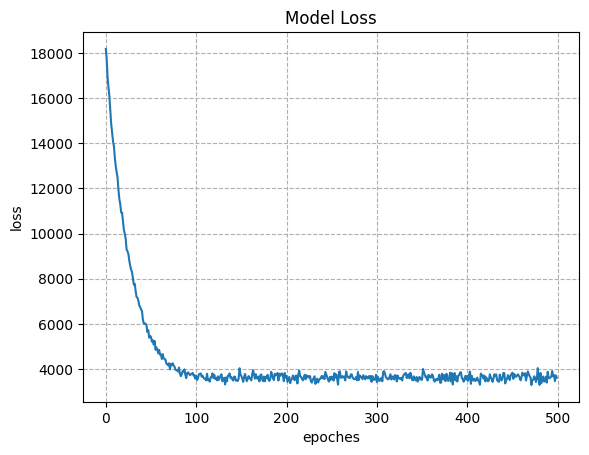

In [85]:
plt.plot(train_history)

plt.title('Model Loss')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.grid(True, linestyle='--')

plt.show()

In [86]:
torch.save(model.state_dict(), 'model3.pth')

##### 예측

In [132]:
model_test = LSTMModel(input_size, hidden_size, output_size)

model_test.to(device)

model_test.load_state_dict(torch.load('model3.pth'))

C:\Users\ldh75\AppData\Local\Temp\ipykernel_20144\643798106.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_test.load_state_dict(torch.load('model3.pth'))


<All keys matched successfully>

##### X 데이터

- 제주 기상 예측 (n+1)
- 제주 전력 시장 실시간 (n-1)
- 제주 전력 시장 현황 (n-1)

In [88]:
dfs = [weather_forecast_1, smp_rt_rc, elec_supply]

input_data = reduce(lambda left, right: pd.merge(left, right, on='datetime', how='inner'), dfs)

target_day = datetime.strptime(target_date['predict_target_date'], '%Y-%m-%d')

input_data = input_data.loc[
  (input_data['datetime'] > target_day) &
  (input_data['datetime'] <= target_day + timedelta(days=1))
]

In [89]:
input_data

,datetime,temp,real_feel_temp,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,...,precip_1h,실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh),공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW)
5913,2024-11-07 01:00:00,12.222216,8.580243,63.777778,5.555557,83.555556,23.496410,40.770044,0.000000,16.0934,...,0.0,99.328000,99.328000,1.100333e+06,534416.666667,0.000000,168678.500000,168965.166667,561166.666667,284666.666667
5914,2024-11-07 02:00:00,12.037027,8.209879,64.555556,5.493828,83.888889,23.710999,42.200578,0.000000,16.0934,...,0.0,90.980000,90.980000,1.126000e+06,504454.545455,0.000000,195147.636364,195530.909091,616909.090909,340818.181818
5915,2024-11-07 03:00:00,11.728404,7.716048,65.777778,5.493828,84.333333,24.318967,43.863567,0.000000,16.0934,...,0.0,87.472000,87.472000,1.107692e+06,488692.307692,0.000000,175641.384615,176024.076923,614153.846154,338461.538462
5916,2024-11-07 04:00:00,11.851849,7.777776,65.777778,5.617286,85.333333,25.534900,46.295478,0.000000,16.0934,...,0.0,87.500000,87.500000,1.122818e+06,483818.181818,0.000000,189383.818182,189739.272727,636363.636364,358545.454545
5917,2024-11-07 05:00:00,12.283944,8.086418,65.333333,5.864200,86.555556,26.357464,48.566444,0.000000,16.0934,...,0.0,93.568000,93.568000,1.140615e+06,500769.230769,0.000000,205768.769231,206014.076923,645384.615385,357769.230769
5918,2024-11-07 06:00:00,12.530867,8.271609,65.000000,6.172839,87.888889,27.805889,51.463267,0.000000,16.0934,...,0.0,103.163333,103.163333,1.134545e+06,515545.454545,0.000000,200647.454545,200892.727273,614181.818182,361909.090909
5919,2024-11-07 07:00:00,12.592600,8.271609,65.555556,6.296296,201.111111,28.628433,53.716356,0.000000,16.0934,...,0.0,105.174000,105.174000,1.123846e+06,557923.076923,252.720000,189504.307692,190047.923077,567000.000000,384384.615385
5920,2024-11-07 08:00:00,12.901233,8.950614,64.666667,6.358027,202.222222,30.058956,55.772744,0.666667,16.0934,...,0.0,110.203333,110.203333,1.191091e+06,589454.545455,26686.093636,189384.363636,216315.000000,608181.818182,428636.363636
5921,2024-11-07 09:00:00,13.580233,9.938277,61.444444,6.419756,203.222222,31.918644,57.811233,1.333333,16.0934,...,0.0,125.198000,125.198000,1.229462e+06,630769.230769,54029.761538,192400.153846,246674.846154,595692.307692,425769.230769
5922,2024-11-07 10:00:00,14.691356,11.851853,57.666667,6.358027,164.888889,30.058956,55.379333,2.111111,16.0934,...,0.0,136.940000,136.940000,1.261000e+06,618272.727273,78106.536364,200806.454545,279157.909091,638090.909091,457909.090909


In [90]:
predict_set = ElecDataset(input_data, Y.iloc[:24])

predict_dataloader = DataLoader(dataset=predict_set,
                        batch_size=24,
                        shuffle=False)

In [91]:
model_test.eval()

with torch.no_grad():
  for inputs, _ in predict_dataloader:
    inputs = inputs.to(device)
    predictions = model_test(inputs)

print(predictions)

tensor([[127.2242, 113.2132, 109.0256, 105.2179, 103.6661,  88.1136, 115.8661,
         119.8741, 114.4550,  90.1072,  85.5760,  63.6499,  41.2559,  63.7022,
          87.0394, 101.1401, 125.6768, 142.8918, 153.8192, 153.2875, 150.6304,
         148.3466, 143.4920, 137.2538]], device='cuda:0', dtype=torch.float64)


In [92]:
flattened_list = predictions.view(-1).tolist()

print(flattened_list)

[127.22417846109808, 113.21317361419074, 109.02557645213248, 105.2179248565161, 103.66606726247811, 88.1135528239811, 115.86612396244308, 119.87410026761937, 114.45500671373199, 90.10720552840525, 85.57603223353837, 63.64991765189635, 41.25590226810078, 63.7021947952296, 87.0394174771627, 101.14010464704145, 125.67679292029453, 142.89181442028917, 153.81920229775056, 153.28749198324354, 150.63040547761136, 148.34661022432758, 143.49199737590592, 137.25382725024105]


##### 분석

예측결과

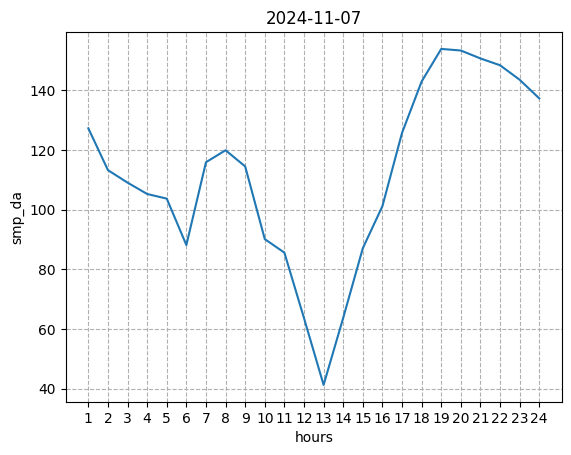

In [93]:
plt.plot(list(range(1, 25)), flattened_list)

plt.title(target_date['predict_target_date'])
plt.xlabel('hours')
plt.ylabel('smp_da')
plt.xticks(list(range(1,25, 1)))
plt.grid(True, linestyle='--')

plt.show()